#                                    ITP-NPV Mini-Project-Group '9'
   Made By: Jay Dixit

                                              BANK MARKETING

PROBLEM STATEMENT:

The problem is that the Bank Marketing campaigns of a Portuguese banking institution need to identify the factors that cause the customers to tend to take the subscription, as well as Bank Marketing campaigns of a Portuguese banking institution need to identify the reasons behind the customer which make them not take the subscription.

Aim:

You aim to Determinate/Analysis factors for the subscription and non-subscription. Using the ITP and NPV techniques find the below questions.


DATASET DESCRIPTION:

Bank Marketing: The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required to assess if the product (bank term deposit) would be (or not) subscribed.


In [1]:
# READING THE DATASET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
bank = pd.read_csv('bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# CHECKPOINT 1

In [3]:
# DETERMINING THE DATATYPES
# A
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
# B


In [5]:
# C
bank.isnull().sum()
# no missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# D
bank.duplicated()
# no duplicated values

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

# CHECKPOINT 2

<AxesSubplot:xlabel='y'>

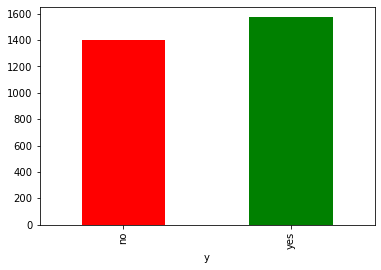

In [7]:
# 3
bank.groupby(['y'])['balance'].mean().plot(kind='bar',color=['r','g'])

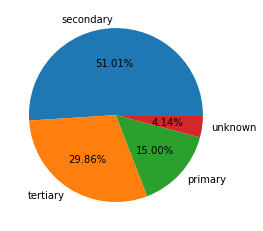

In [8]:
# 4
c1 = bank.education.value_counts()
c1
plt.pie(c1,autopct='%0.2f%%',labels = c1.index)
plt.show()

In [9]:
# 5
def Season(month):
    if month in ['dec','jan','feb']:
        return 'winter'
    elif month in ['mar','apr','may']:
        return 'summer'
    elif month in ['jun','jul','aug']:
        return 'rainy'
    else:
        return 'spring'

In [10]:
bank['Season'] = bank['month'].map(Season)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,spring
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,summer
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,summer
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,rainy
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,rainy
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,summer
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,rainy
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,winter


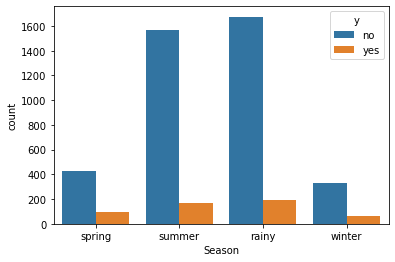

In [11]:
# 6
sns.countplot(bank['Season'],hue=bank['y'])
plt.show()

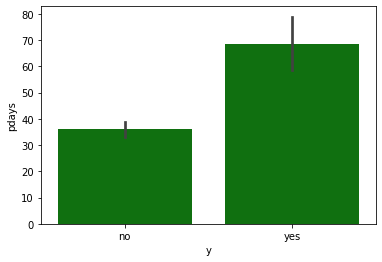

In [12]:
# 7
sns.barplot(bank['y'],bank['pdays'],color='g')
#plt.xlabel('')
plt.show()

In [13]:
# 8
bank['pdays']=bank['pdays'].replace(-1,np.nan)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,spring
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,summer
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,summer
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,rainy
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,NaN,0,unknown,no,rainy
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,NaN,0,unknown,no,summer
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,NaN,0,unknown,no,rainy
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211.0,3,other,no,winter


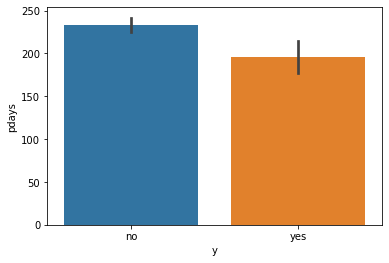

In [14]:
# 9
sns.barplot(x='y',y=bank['pdays'],data=bank)


plt.show()

In [15]:
# 10
b1 = bank[(bank.balance <= 0  )  &  (bank.y == "yes")]
b1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
70,37,management,married,tertiary,no,0,no,no,cellular,16,jul,268,2,182.0,3,success,yes,rainy
92,27,services,single,secondary,no,-195,yes,no,cellular,18,may,391,1,NaN,0,unknown,yes,summer
138,52,management,married,tertiary,no,-970,yes,no,cellular,4,feb,489,1,NaN,0,unknown,yes,winter
189,56,retired,married,secondary,no,-1206,yes,no,cellular,15,jun,382,2,NaN,0,unknown,yes,rainy
295,49,entrepreneur,divorced,unknown,yes,-701,yes,no,cellular,30,jul,988,2,NaN,0,unknown,yes,rainy
297,45,blue-collar,divorced,primary,no,-311,yes,no,unknown,23,may,1030,1,NaN,0,unknown,yes,summer
409,54,admin.,married,secondary,no,0,no,no,cellular,28,jan,161,1,98.0,2,failure,yes,winter
661,28,management,single,tertiary,no,0,yes,no,cellular,16,jul,767,5,NaN,0,unknown,yes,rainy
941,34,management,married,tertiary,no,0,yes,no,cellular,7,aug,262,1,99.0,2,success,yes,rainy
1017,49,blue-collar,married,secondary,no,-454,yes,no,cellular,14,may,558,1,NaN,0,unknown,yes,summer


In [16]:
#bal_2 = bank['y'][bank['balance'] < 0].value_counts()
#plt.pie(bal_2,labels=['NO term subscription','Term subscription'],autopct='%0.2f%%')
#plt.show()

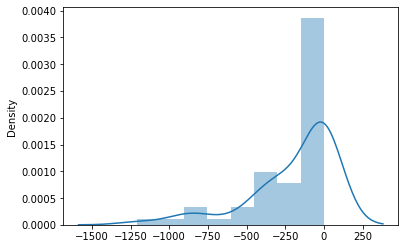

In [17]:
sns.distplot(x=b1['balance'],kde=True)
plt.show()

In [18]:
# 11
pd.pivot_table(bank,index=['job'],values=['balance'],aggfunc=['max'])

,max
,balance
job,
admin.,22171
blue-collar,16353
entrepreneur,42045
housemaid,26965
management,27359
retired,71188
self-employed,16430
services,26394


[]

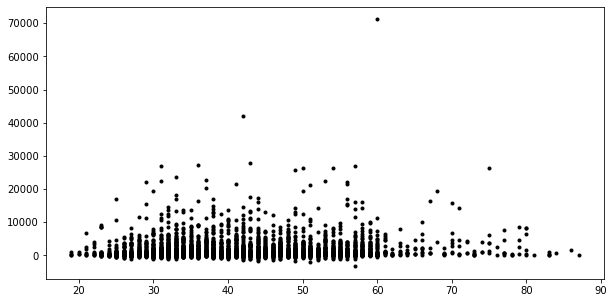

In [19]:
# 12
plt.figure(figsize=(10,5))
plt.scatter(bank['age'],bank['balance'],marker='.',color='k')
plt.plot()

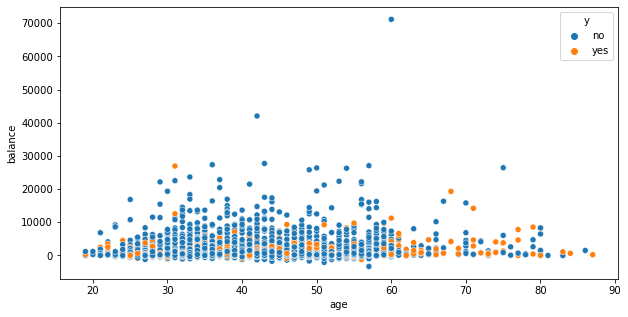

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=bank,x='age',y='balance',hue='y')
plt.show()

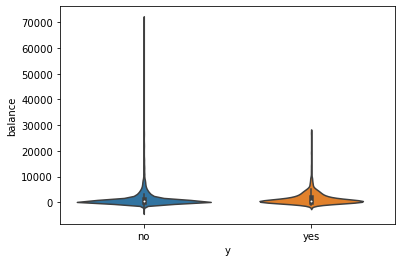

In [21]:
# 13
sns.violinplot(x='y',y='balance',data=bank)
plt.show()

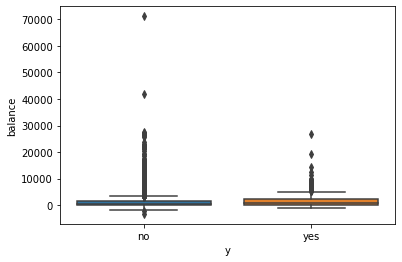

In [22]:
sns.boxplot(x='y',y='balance',data=bank)
plt.show()

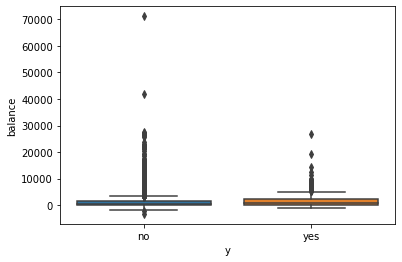

In [23]:
sns.boxplot(data=bank, x='y',y='balance')
plt.show()

Boxplot shows the summary statistics only i.e.minimum,the quartiles and the maximum
but the violinplot shows the distribution of the data along with the statistics

In [24]:
# 14
c = bank.default.value_counts()
c

no     4445
yes      76
Name: default, dtype: int64

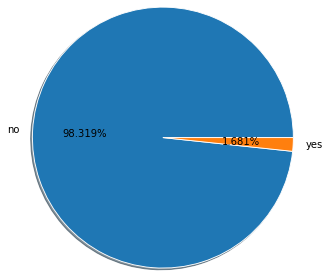

In [25]:
plt.pie(c,autopct='%0.3f%%',shadow=True,labeldistance=1.1,labels=c.index,radius=1.5,wedgeprops={'linewidth':0.9,'edgecolor':'w'})
plt.show()

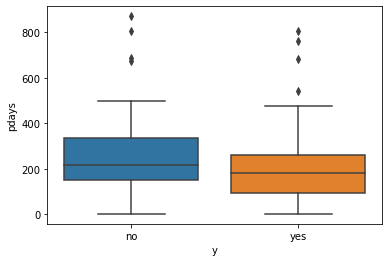

In [26]:
# 15
sns.boxplot(x='y',y='pdays',data=bank)
plt.show()


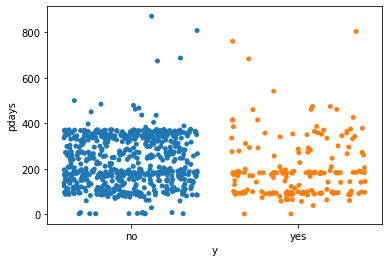

In [27]:
sns.stripplot(x='y',y='pdays',data=bank,jitter=0.4)
plt.show()

BoxPlot demonstrates the summary statistics such as minimum,the quartiles and the maximum values
Strip plot is a single-axis scatter plot that is used to visualise the distribution of many individual one-dimensional values.

In [28]:
a=bank['y'].value_counts()
a

no     4000
yes     521
Name: y, dtype: int64

In [29]:
a.values

array([4000,  521], dtype=int64)

In [30]:
a.index

Index(['no', 'yes'], dtype='object')

In [31]:
# Non-Subscribers
(a.values[0]/bank['y'].count())*100

88.47600088476001

In [32]:
(a.values[0]/len(bank['y']))*100

88.47600088476001

In [33]:
bank['y'].count()

4521

In [34]:
# Subscribers
(a.values[1]/bank['y'].count())*100

11.523999115239992

<AxesSubplot:ylabel='y'>

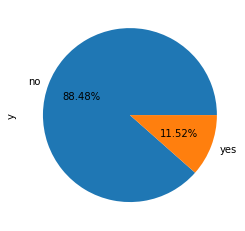

In [42]:
bank['y'].value_counts().plot(kind='pie',autopct='%0.2f%%')


In [40]:
balance0 = bank['y'][bank['balance'] < 0].value_counts()
balance0

no     335
yes     31
Name: y, dtype: int64

In [ ]:
pd.pivot_table(bank,index=)